In [1]:
import warnings
import random

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
import matplotlib.pyplot as plt

from estimation_utils import load_data, load_graph, propensity_overlap_graph, estimate_effects

In [2]:
plt.style.use('ggplot')

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [5]:
df = load_data()
graph = load_graph()
# results = estimate_effects(df, graph)
# pd.DataFrame(results, index=[0]).T.rename(columns={0: "ATE"})

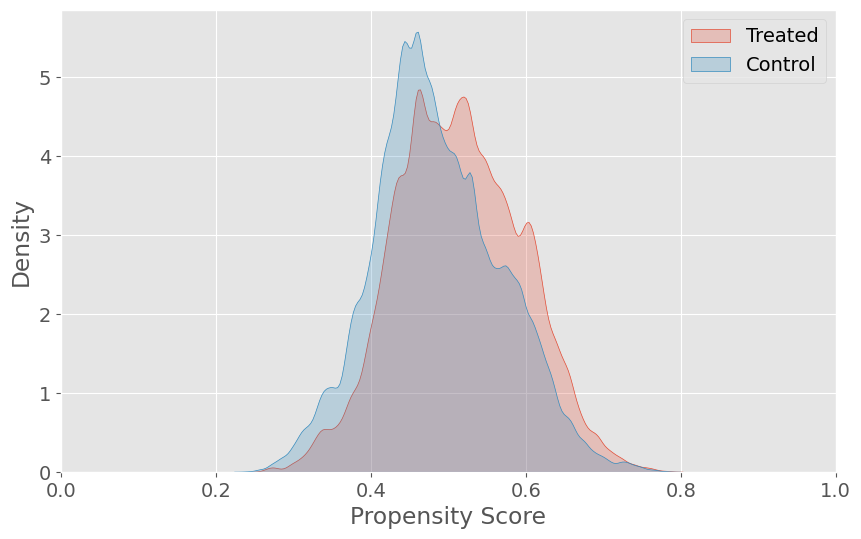

Common support approx in [0.264, 0.784]. Coverage — Treated: 1.000, Control: 1.000


In [6]:
ps_model = LogisticRegression(max_iter=2000, class_weight="balanced")
_ = propensity_overlap_graph(
    df,
    graph,
    method="backdoor.propensity_score_weighting",
    ps_model=ps_model,
    figpath="figs/propensity_overlap.svg"
)

In [ ]:
results, ci_df, boot_df = estimate_effects(df, graph, return_cis=True, n_boot=100)

In [ ]:
boot_df = pd.read_csv('bootstraps/current.csv')
boot_df = boot_df.rename(columns={
    c: ' '.join(c.split('.')[1:]).title().replace('_', ' ').replace('Propensity', 'Prop.').replace('Linear Regression', 'S-Learner').replace('T Learner', 'T-Learner').replace('Distance Matching', 'Distance Matching\n(Gower\'s Distance)')
    for c in boot_df.columns
})

In [ ]:
plt.figure(figsize=(30, 10))
plt.rcParams.update({'font.size': 25})
sns.violinplot(data=boot_df)
plt.ylabel("ATE")
plt.xticks(rotation=0)
plt.tight_layout()
# plt.savefig("figs/ate_comparison_violin.svg", format="svg", bbox_inches="tight")
plt.show()